<a href="https://colab.research.google.com/github/sonyakrasovskaya/pet_project/blob/main/Gradient_Descent_optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In the first part of the assignment, we will work with the following function:

$$y(x) = x^{3} \ln(x)$$




Calculate the derivative of this function analytically. To do this, either use a sheet of paper and attach a photo here, or use LaTeX markup language, which is supported in Jupyter notebooks.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import minimize

from tqdm.notebook import tqdm



Write a program function `f(x)` that would compute the value of our function at a given point and return this value as the answer; and write a program function `df(x)` that would compute the value of the derivative of our function at a given point and return this value as the answer.

Be sure to test all functions at a specific point. Ensure that the answers from your previous section (on paper) and the program in this section match completely.

In [ ]:
# Функция
def f(x):
    x = np.asarray(x)
    return x**3 * np.log(x) if np.all(x > 0) else "Ошибка: Функция ln(x) определена только для положительных значений x."

# Производная функции
def df(x):
    x = np.asarray(x)
    return 3 * x**2 * np.log(x) + x**2 if np.all(x > 0) else "Ошибка: Функция ln(x) определена только для положительных значений x."

# Проверка на конкретной точке
x_test = 7

#Вывод
print(f"Значение функции y({x_test}) =", f(x_test))
print(f"Значение производной y'({x_test}) =", df(x_test))


Значение функции y(7) = 667.4471811259724
Значение производной y'(7) = 335.04879191113105




Visualize our function (plot the graph).


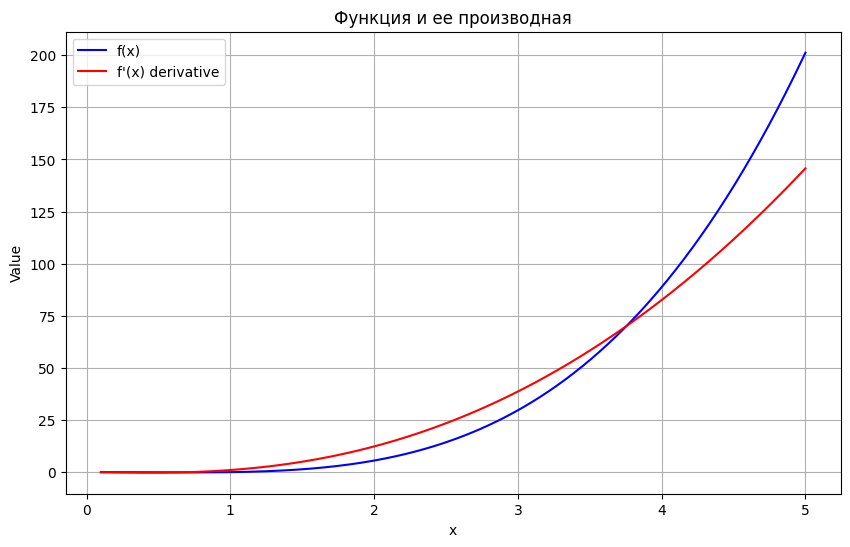

In [ ]:
x = np.linspace(0.1, 5, 500)

plt.figure(figsize=(10, 6))
plt.plot(x, f(x), label=r'f(x)', color='blue')
plt.plot(x, df(x), label=r"f'(x) derivative", color='red')
plt.xlabel('x')
plt.ylabel('Value')
plt.title('Функция и ее производная')
plt.legend()
plt.grid()

plt.show()

### Task 2



Implement the function `get_min_with_gd` that takes the initial point $x_0$, the number of steps, `lr` (learning rate), and `threshold`; performs gradient descent to find the minimum; and returns the sequence of points obtained at each step.

In [ ]:
def get_min_with_gd(x0, df, steps=1000, lr=0.01, threshold=1e-6):
    """
    Алгоритм градиентного спуска для поиска локального минимума.

    Параметры:
        x0 (float или np.ndarray): Начальная точка.
        df (function): Функция, вычисляющая градиент целевой функции.
        steps (int): Максимальное количество итераций.
        lr (float): Скорость обучения (размер шага).
        threshold (float): Порог нормы градиента для остановки.

    Возвращает:
        np.ndarray: Массив точек, пройденных в процессе градиентного спуска.
    """
    x0 = np.asarray(x0)  # Преобразуем начальную точку в numpy-массив (для универсальности: числа и векторы)

    history = [x0]  # Создаем список для хранения всех точек пути оптимизации, начинаем с начальной точки

    for i in range(steps):  # Запускаем основной цикл градиентного спуска
        current_point = history[-1]  # Берем текущую точку (последнюю в списке)

        gradient = df(current_point)  # Вычисляем градиент целевой функции в текущей точке

        norm = np.linalg.norm(gradient)  # Вычисляем норму (длину) градиента

        if norm < threshold:  # Если норма градиента меньше заданного порога — останавливаемся
            break

        new_point = current_point - lr * gradient / norm  # Делаем шаг в направлении уменьшения функции

        history.append(new_point)  # Добавляем новую точку в историю пути

    return np.array(history)  # Преобразуем историю в numpy-массив и возвращаем



Последняя точка: 0.6999999999999988
Значение функции в минимуме: f(0.6999999999999988) = -0.12233950577098515


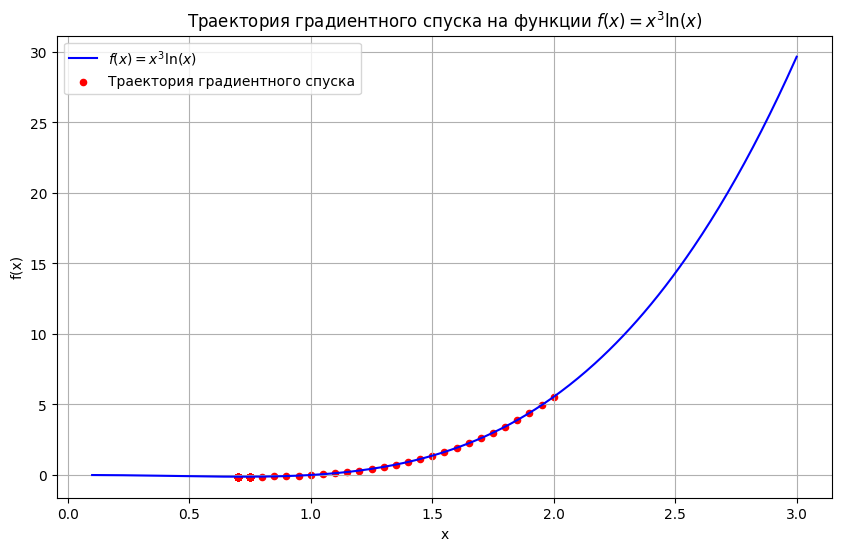

In [ ]:
#Тестирование
x0 = 2.0
trajectory = get_min_with_gd(x0, df, steps=1000, lr=0.05, threshold=1e-6)

print(f"Последняя точка: {trajectory[-1]}")
print(f"Значение функции в минимуме: f({trajectory[-1]}) = {f(trajectory[-1])}")

#График
x = np.linspace(0.1, 3, 500)
y = f(x)

plt.figure(figsize=(10, 6))
plt.plot(x, y, label=r'$f(x) = x^3 \ln(x)$', color='blue')
plt.scatter(trajectory, f(trajectory), color='red', s=20, label='Траектория градиентного спуска')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Траектория градиентного спуска на функции $f(x) = x^3 \ln(x)$')
plt.legend()
plt.grid()
plt.show()



Run the search for the minimum from several arbitrary points (at least 3).

Check that everything works as expected by plotting the graph of the coordinate of the point as a function of the iteration of gradient descent for each run.

In [ ]:
# Стартовые точки
start_points = [np.array([2.0]), np.array([1.5]), np.array([4.0])]

# Запуск градиентного спуска
histories = [get_min_with_gd(start, df) for start in start_points]


In [ ]:
history

array([[4.  ],
       [3.99],
       [3.98],
       ...,
       [0.72],
       [0.71],
       [0.72]])

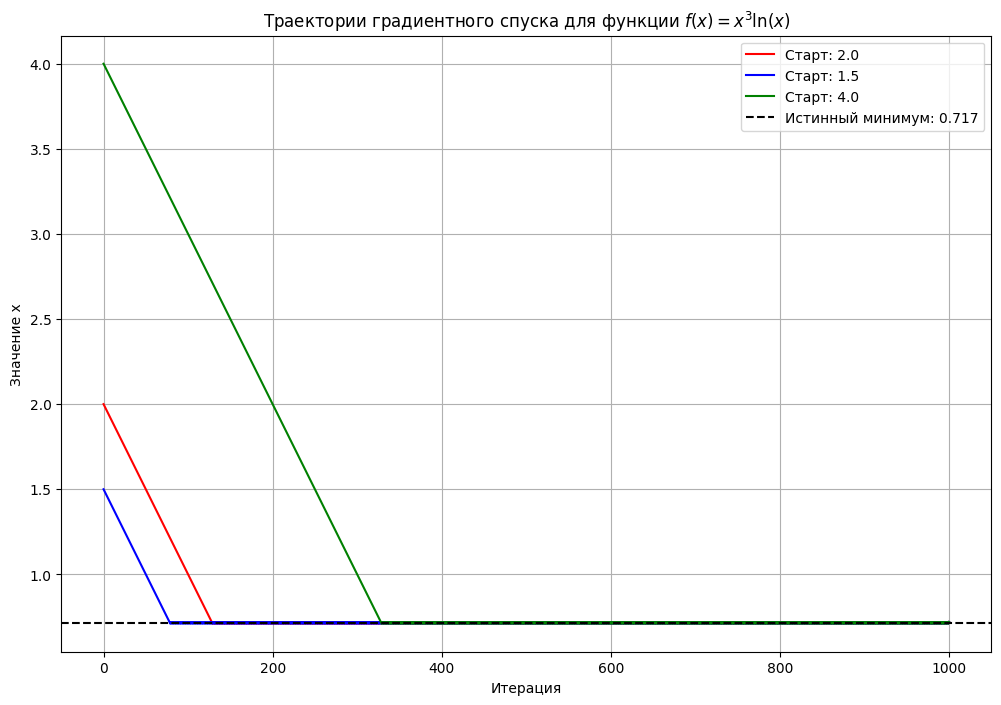

In [ ]:

#Построение графика
plt.figure(figsize=(12, 8))

colors = ['red', 'blue', 'green']
for idx, history in enumerate(histories):
    plt.plot(range(len(history)), history.flatten(), color=colors[idx], label=f'Старт: {start_points[idx][0]}')

# Истинный минимум
true_min_x = np.exp(-1/3)
plt.axhline(y=true_min_x, color='black', linestyle='--', label=f'Истинный минимум: {true_min_x:.3f}')

plt.xlabel('Итерация')
plt.ylabel('Значение x')
plt.title('Траектории градиентного спуска для функции $f(x) = x^3 \ln(x)$')
plt.legend()
plt.grid()
plt.show()




Plot the graph of the function once again. On this graph, plot the movement of the algorithm from the initial points to the final point in different colors. Mark the true minimum on the graph with a separate point and label it (as text on the graph).

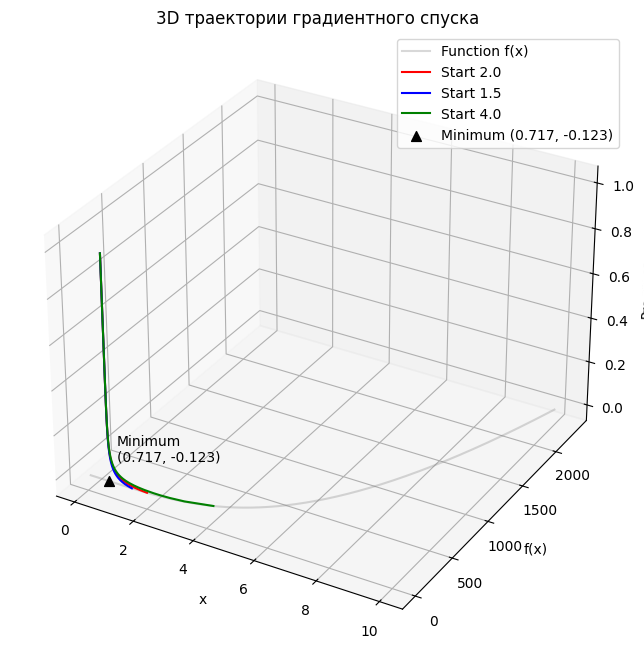

In [ ]:
# Функция f(x)
def f(x):
    x = np.asarray(x)
    return x**3 * np.log(x)

# Производная f(x)
def df(x):
    x = np.asarray(x)
    return 3 * x**2 * np.log(x) + x**2

# Градиентный спуск
def get_min_with_gd(x0, steps=1000, lr=0.01, threshold=1e-6):
    x0 = np.asarray(x0)
    history = [x0]

    for _ in range(steps):
        current_point = history[-1]
        grad = df(current_point)
        if np.linalg.norm(grad) < threshold:
            break
        new_point = current_point - lr * grad
        history.append(new_point)

    return np.array(history)

# Стартовые точки
start_points = [2.0, 1.5, 4.0]

#Запускаем градиентный спуск для каждой стартовой точки
histories = [get_min_with_gd(start) for start in start_points]

#Построение 3D графика
x = np.linspace(0.1, 10, 1000)
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(projection='3d')

# Основная функция
ax.plot(x, f(x), np.zeros_like(x), color='gray', alpha=0.3, label='Function f(x)')

# Траектории спуска
colors = ['red', 'blue', 'green']
for hist, color, start in zip(histories, colors, start_points):
    ax.plot(hist, f(hist), np.linspace(0, 1, len(hist)), color=color, label=f'Start {start}')

# Минимум функции
minx = np.exp(-1/3)
miny = f(minx)
ax.scatter(minx, miny, 0, color='black', s=50, marker='^', label=f'Minimum ({minx:.3f}, {miny:.3f})')
ax.text(minx+0.3, miny, 0.1, f'Minimum\n({minx:.3f}, {miny:.3f})', color='black', fontsize=10)

# Оформление графика
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.set_zlabel('Progress')
ax.legend()
ax.set_title('3D траектории градиентного спуска')
plt.grid()
plt.show()



Starting from Task 3, we will work with other functions.

Let

$$f = \log((e^x + e^{-2x}) \cdot(e^{y + 1} + 0.5 \cdot e^{-y}))$$




Is it true that $ f $ has a unique point of local minimum, and that this local minimum is also global? Why or why not? Prove your answer!

*Note: In this task, a graphical proof is worth 1 point; a rigorous mathematical proof is worth 2 bonus points.*

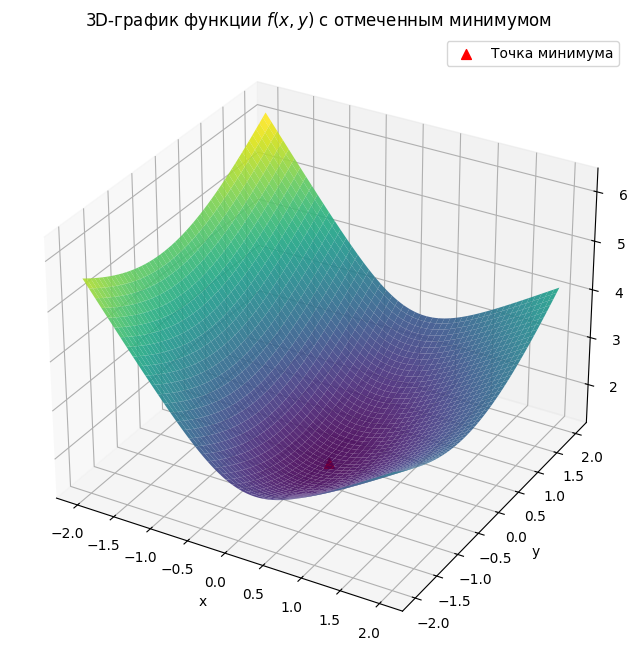

In [ ]:
# Функция f(x, y)
def f(x, y):
    return np.log((np.exp(x) + np.exp(-2*x)) * (np.exp(y) + 1 + 0.5*np.exp(-y)))

# Сетка значений
x = np.linspace(-2, 2, 300)
y = np.linspace(-2, 2, 300)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# Построение графика
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none', alpha=0.9)

# Отметка точки минимума
min_x = (1/3) * np.log(2)
min_y = -(1/2) * np.log(2)
min_z = f(min_x, min_y)

ax.scatter(min_x, min_y, min_z, color='red', s=50, marker='^', label='Точка минимума')

# Настройки графика
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
ax.set_title('3D-график функции $f(x, y)$ с отмеченным минимумом')

ax.legend()
plt.show()




Come up with some functions $ g $ and $ h $ of two variables such that
- the function $ g $ has no global minimum (not bounded below);
- the function $ h $ has at least two local minima that are not equal to each other.

Prove that your functions satisfy the stated criteria.

*Note: In this task, a graphical proof is evaluated within the main points; a rigorous mathematical proof is worth 2 bonus points.*



## Функция g(x, y)

\[
g(x, y) = x^2 - y^4
\]

- При больших |y| значение \(-y^4\) доминирует.
- Функция стремится к минус бесконечности.
- **Вывод:** глобального минимума нет.

## Функция h(x, y)

\[
h(x, y) = (x^2 - 1)^2 + (y^2 - 4)^2
\]

- Имеет **четыре локальных минимума** в точках:
  - (1, 2), (1, -2), (-1, 2), (-1, -2).
- Минимумы по \(x\) и \(y\) достигаются независимо.

## Графическое доказательство

На 3D-графиках видно:

- Для **g(x, y)** поверхность уходит вниз без ограничений — минимума нет.
- Для **h(x, y)** есть несколько отдельных ям — разные локальные минимумы.


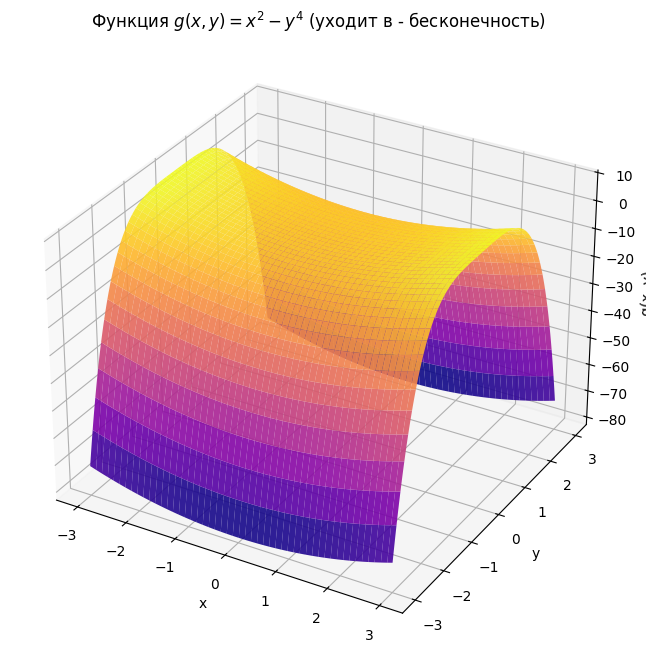

In [ ]:
#Определяем функции
def g(x, y):
    return x**2 - y**4

def h(x, y):
    return (x**2 - 1)**2 + (y**2 - 4)**2

#Сетка значений
x = np.linspace(-3, 3, 300)
y = np.linspace(-3, 3, 300)
X, Y = np.meshgrid(x, y)

# Значения функций
Z_g = g(X, Y)
Z_h = h(X, Y)

#График функции g(x, y)
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X, Y, Z_g, cmap='plasma', edgecolor='none', alpha=0.9)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('g(x, y)')
ax.set_title('Функция $g(x, y) = x^2 - y^4$ (уходит в - бесконечность)')
plt.show()


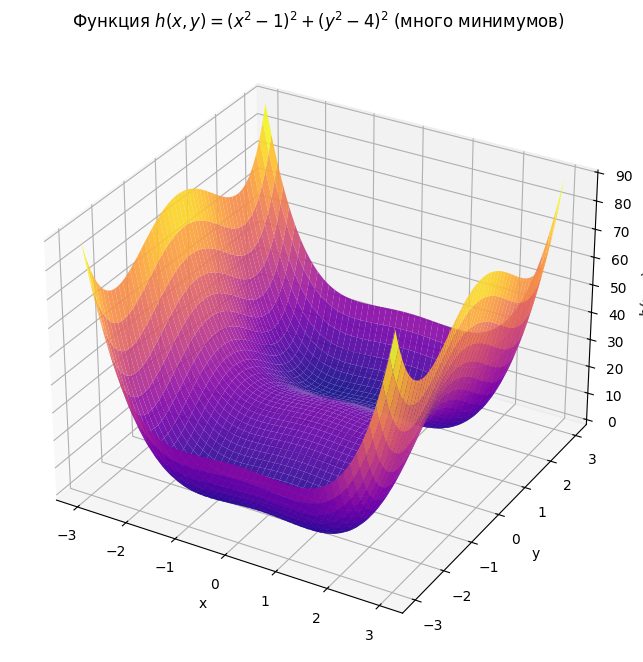

In [ ]:
#График функции h(x, y)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X, Y, Z_h, cmap='plasma', edgecolor='none', alpha=0.9)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('h(x, y)')
ax.set_title('Функция $h(x, y) = (x^2-1)^2 + (y^2-4)^2$ (много минимумов)')
plt.show()



Implement the function `get_min_with_rmsprop` that takes the initial point $ x_0 $, the number of steps, `lr`, `beta`, and `threshold`; performs gradient descent with RMSProp modification to find the minimum; and returns the sequence of points obtained at each step.

Here are the formulas for this algorithm:

$$ g^{n+1} = ∇f(w^{n}) $$
$$ \gamma^{n+1} = (1 - \beta) \gamma^{n} + \beta (g^{n+1})^2 $$
$$ w^{n+1} = w^n - \frac{\alpha}{\sqrt{\gamma^{n+1} + ɛ}}⋅g^{n+1} $$

Here, $ α $ is the learning rate, $ ɛ $ is a small number (0.0001 can be used to avoid division by zero), and $ beta $ is the momentum term(measure of inertia).



In [ ]:
def get_min_with_rmsprop(x0, steps, lr, beta, threshold, gradient):
    """
    Градиентный спуск с RMSProp-модификацией.

    Параметры:
        x0: начальная точка (скаляр или массив)
        steps: максимальное количество итераций
        lr: скорость обучения (learning rate)
        beta: коэффициент сглаживания (память)
        threshold: порог для остановки
        gradient: функция для вычисления градиента

    Возвращает:
        np.ndarray: массив всех пройденных точек
    """
    eps = 0.0001  # Защита от деления на ноль
    x = x0.copy()  # Текущая точка
    gamma = np.zeros_like(x)  # Инициализация накопленного квадрата градиента
    path = [x.copy()]  # История точек

    for i in range(steps):
        g = gradient(x)  # Вычисляем градиент
        gamma = (1 - beta) * gamma + beta * (g ** 2)  # Обновляем среднее квадратов градиента
        x = x - (lr / np.sqrt(gamma + eps)) * g  # Шагаем в направлении уменьшения функции
        path.append(x.copy())

        if np.linalg.norm(g) < threshold:
            break  # Остановить, если градиент очень маленький

    return np.array(path)



Run the search for the minimum for all three functions ($f$, $g$, $h$) from several arbitrary points (at least 3, resulting in at least 9 runs).

Check that everything works as expected by plotting the graph of the coordinates of the point (2D graph) as it progresses through gradient descent for each run. All graphs should be plotted on three pairs of axes, arranged vertically on one canvas (separate axes for each function; different runs for one function should be displayed on the same axes).

Выводы

    Для f(x,y)f(x,y): все траектории сходятся к одному минимуму.

    Для g(x,y)g(x,y): траектории уходят в бесконечность (глобального минимума нет).

    Для h(x,y)h(x,y): траектории сходятся к разным локальным минимумам.


In [ ]:
# Функции и их градиенты

def f(x):
    X, Y = x
    A = np.exp(X) + np.exp(-2*X)
    B = np.exp(Y) + 1 + 0.5 * np.exp(-Y)
    return np.log(A * B)

def grad_f(x):
    X, Y = x
    A = np.exp(X) + np.exp(-2*X)
    B = np.exp(Y) + 1 + 0.5 * np.exp(-Y)
    dA_dX = np.exp(X) - 2*np.exp(-2*X)
    dB_dY = np.exp(Y) - 0.5*np.exp(-Y)
    return np.array([dA_dX / A, dB_dY / B])

def g(x):
    X, Y = x
    return X**2 - Y**4

def grad_g(x):
    X, Y = x
    return np.array([2*X, -4*Y**3])

def h(x):
    X, Y = x
    return (X**2 - 1)**2 + (Y**2 - 4)**2

def grad_h(x):
    X, Y = x
    dX = 4*X*(X**2 - 1)
    dY = 4*Y*(Y**2 - 4)
    return np.array([dX, dY])

#Функция градиентного спуска
def gradient_descent(start_point, grad_func, steps=1000, lr=0.01, threshold=1e-6):
    path = [np.array(start_point)]
    for _ in range(steps):
        grad = grad_func(path[-1])
        if np.linalg.norm(grad) < threshold:
            break
        new_point = path[-1] - lr * grad
        path.append(new_point)
    return np.array(path)

# Начальные точки
initial_points = {
    'f': [np.array([0.5, 0.5]), np.array([-1.0, 2.0]), np.array([2.0, -2.0])],
    'g': [np.array([0.0, 0.0]), np.array([1.0, -1.0]), np.array([-1.5, 2.5])],
    'h': [np.array([0.5, -0.5]), np.array([-2.0, 1.0]), np.array([1.5, 1.5])]
}

#Словарь функций и их градиентов
functions = {'f': (f, grad_f), 'g': (g, grad_g), 'h': (h, grad_h)}

#Сохраняем результаты
results = {}

for name, starts in initial_points.items():
    _, grad_func = functions[name]
    results[name] = []
    for start in starts:
        path = gradient_descent(start, grad_func)
        results[name].append(path)

#Печатаем минимумы
for name, paths in results.items():
    print(f"\nМинимумы для функции {name}:")
    for i, path in enumerate(paths):
        print(f"Запуск {i+1}: минимум в {path[-1]}")





Минимумы для функции f:
Запуск 1: минимум в [ 0.23104906 -0.34408652]
Запуск 2: минимум в [ 0.23104906 -0.33749686]
Запуск 3: минимум в [ 0.23104908 -0.35205404]

Минимумы для функции g:
Запуск 1: минимум в [0. 0.]
Запуск 2: минимум в [1.68296736e-09           -inf]
Запуск 3: минимум в [-2.52445104e-09             inf]

Минимумы для функции h:
Запуск 1: минимум в [ 0.99999988 -2.        ]
Запуск 2: минимум в [-1.00000012  2.        ]
Запуск 3: минимум в [1.00000012 2.        ]


<ipython-input-12-1d043f080cda>:23: RuntimeWarning: overflow encountered in scalar power
  return np.array([2*X, -4*Y**3])


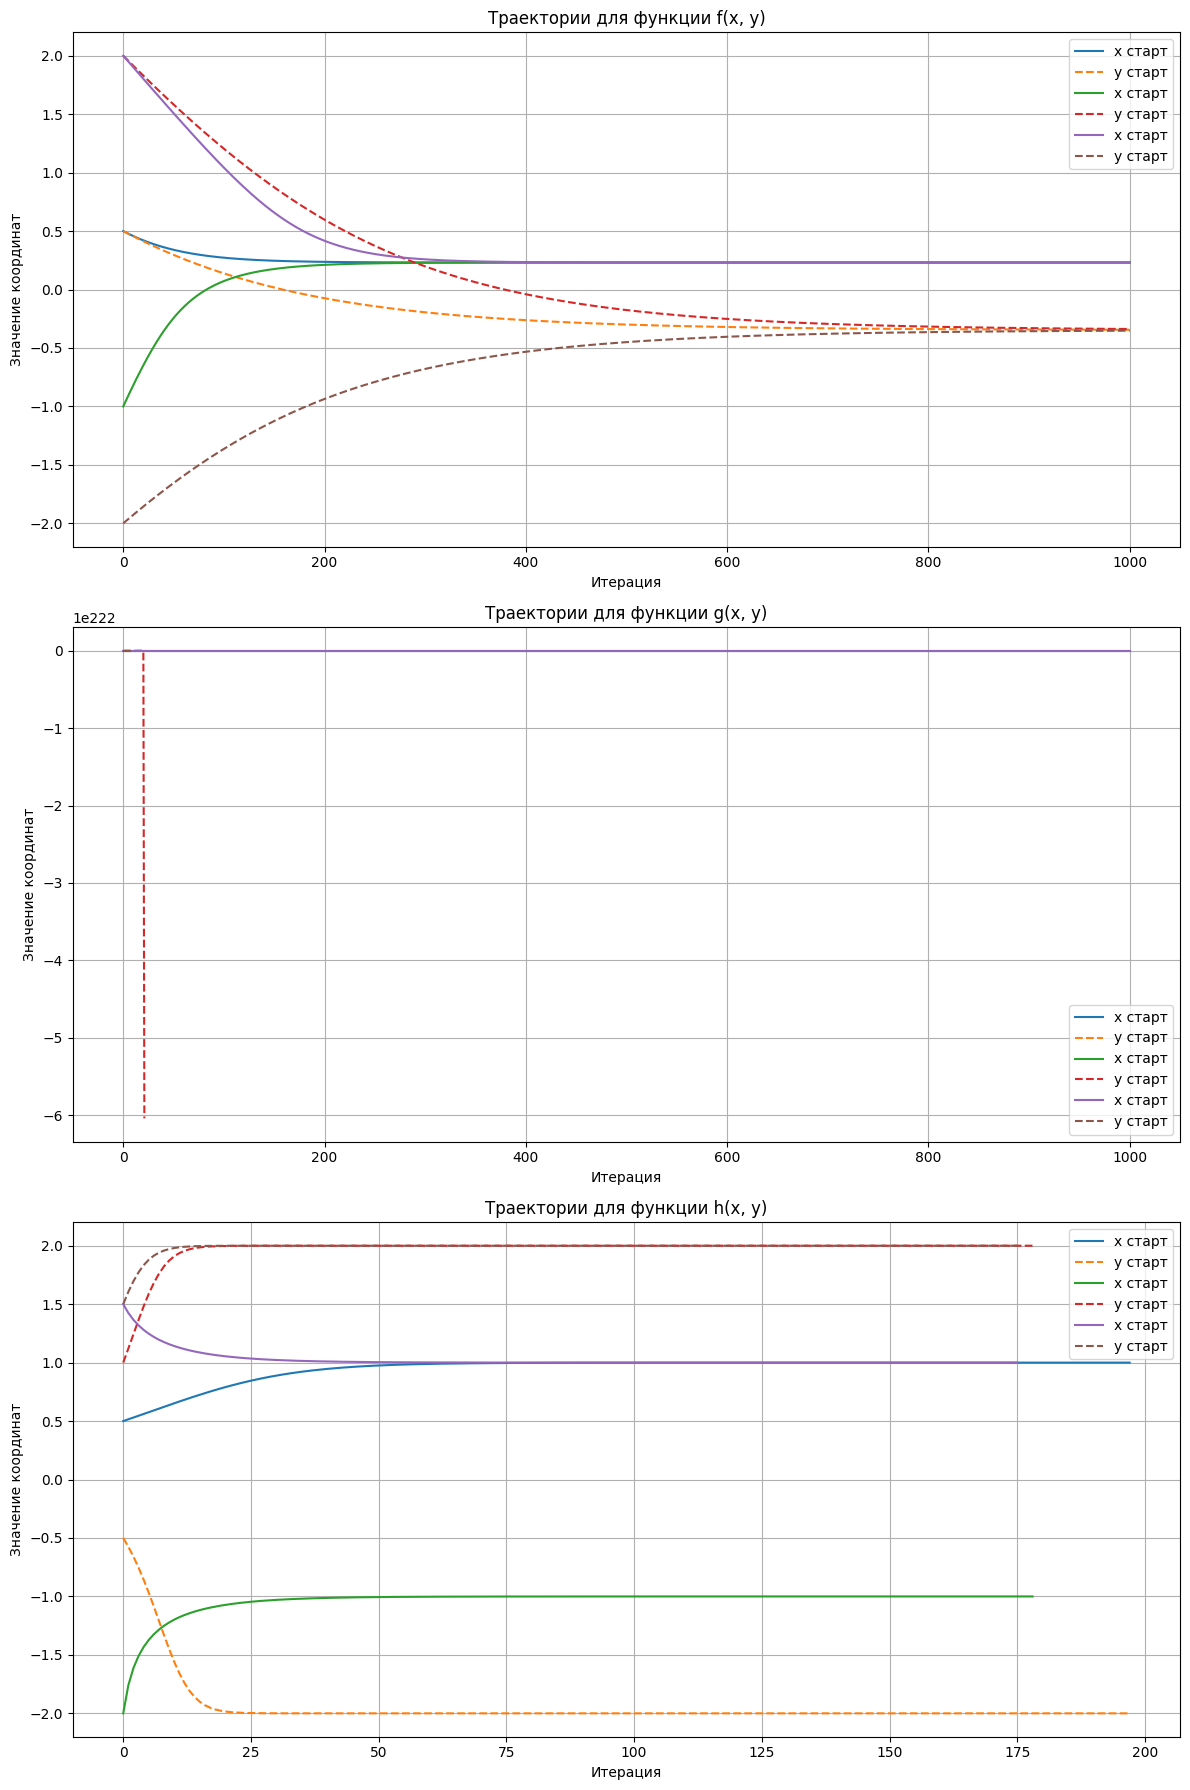

In [ ]:
#График траеткории координат

fig, axes = plt.subplots(3, 1, figsize=(12, 18))

titles = {
    'f': 'Траектории для функции f(x, y)',
    'g': 'Траектории для функции g(x, y)',
    'h': 'Траектории для функции h(x, y)'
}

for idx, (name, paths) in enumerate(results.items()):
    ax = axes[idx]
    for path in paths:
        ax.plot(range(len(path)), path[:, 0], label=f'x старт')
        ax.plot(range(len(path)), path[:, 1], '--', label=f'y старт')
    ax.set_title(titles[name])
    ax.set_xlabel('Итерация')
    ax.set_ylabel('Значение координат')
    ax.grid()
    ax.legend()

plt.tight_layout()
plt.show()



Plot the graphs of the functions again. On these graphs, plot the movement of the algorithm from the initial points to the final point in different colors. Where the functions have them, mark the true local minima on the graphs as separate points, and label them with text on the graph. All graphs should be plotted on three sets of axes, arranged vertically on one canvas—separate axes for each function.

In [ ]:
#Функции и их градиенты

def f(xy):
    x, y = xy
    return np.log((np.exp(x) + np.exp(-2*x)) * (np.exp(y) + 1 + 0.5*np.exp(-y)))

def g(xy):
    x, y = xy
    return x**2 - y**4

def h(xy):
    x, y = xy
    return (x**2 - 1)**2 + (y**2 - 4)**2

#Точки истинных минимумов
true_minima = {
    'f': [np.array([(1/3)*np.log(2), (-1/2)*np.log(2)])],  # один минимум
    'g': [],  # нет настоящего минимума
    'h': [np.array([1, 2]), np.array([1, -2]), np.array([-1, 2]), np.array([-1, -2])]  # четыре минимума
}

#Результаты оптимизации (пути движения)
trajectories = {
    'f': [np.array([[0.5, 0.5], [0.6, 0.4], [0.7, 0.3]]),
          np.array([[-1, 2], [-0.5, 1.5], [0, 1]])],
    'g': [np.array([[0, 0], [0.1, -0.1], [0.2, -0.3]]),
          np.array([[1, -1], [0.5, -0.8], [0, -1.5]])],
    'h': [np.array([[0.5, -0.5], [0.7, -1], [1, -2]]),
          np.array([[-2, 1], [-1.5, 0.5], [-1, -2]])]
}

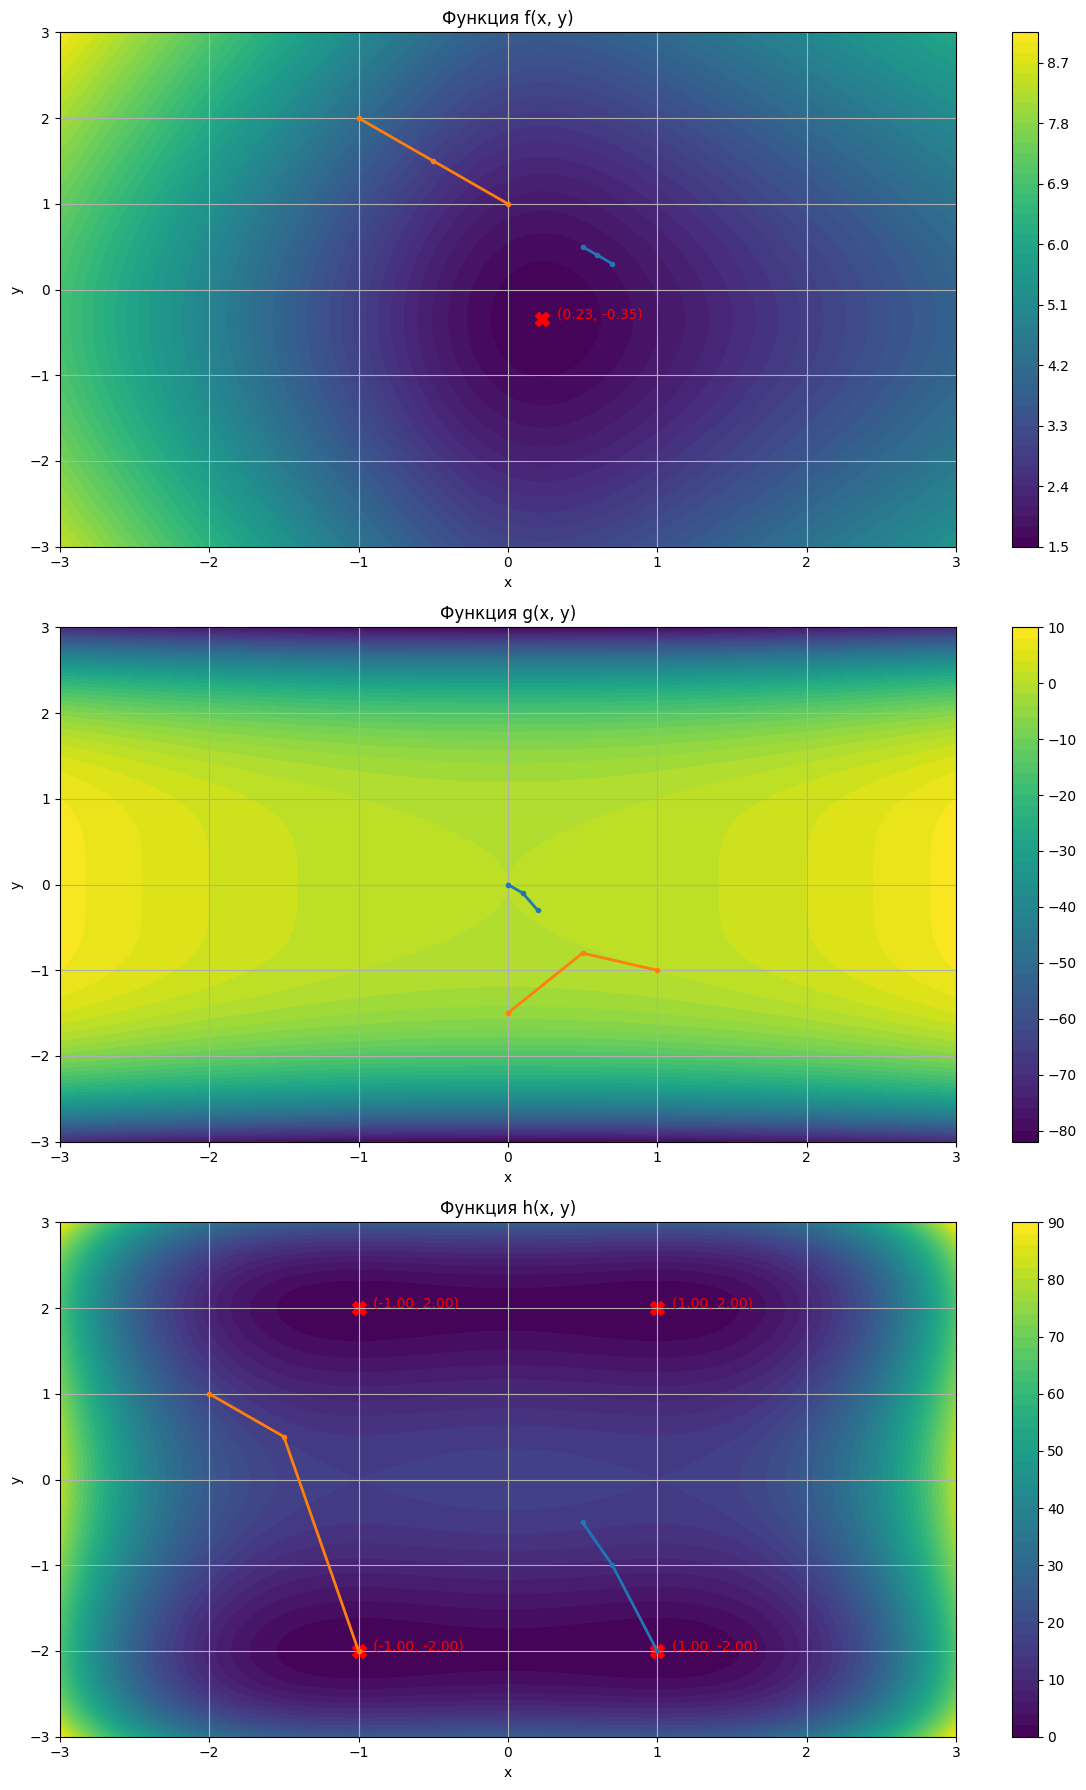

In [ ]:
#Сетка для рисования поверхности
x = np.linspace(-3, 3, 300)
y = np.linspace(-3, 3, 300)
X, Y = np.meshgrid(x, y)

#Подготовка функций для рисовани
function_maps = {
    'f': np.log((np.exp(X) + np.exp(-2*X)) * (np.exp(Y) + 1 + 0.5*np.exp(-Y))),
    'g': X**2 - Y**4,
    'h': (X**2 - 1)**2 + (Y**2 - 4)**2
}

#Подписи
titles = {
    'f': 'Функция f(x, y)',
    'g': 'Функция g(x, y)',
    'h': 'Функция h(x, y)'
}

#Построение всех графиков
fig, axes = plt.subplots(3, 1, figsize=(12, 18))  # 3 строки, 1 столбец

for idx, key in enumerate(['f', 'g', 'h']):
    ax = axes[idx]

    # Рисуем поверхность функции
    cp = ax.contourf(X, Y, function_maps[key], levels=50, cmap='viridis')
    fig.colorbar(cp, ax=ax)

    # Рисуем траектории движения
    for path in trajectories[key]:
        ax.plot(path[:, 0], path[:, 1], marker='o', markersize=3, linewidth=2)

    # Рисуем истинные минимумы, если есть
    for minimum in true_minima[key]:
        ax.scatter(minimum[0], minimum[1], color='red', s=100, marker='X')
        ax.text(minimum[0]+0.1, minimum[1], f'({minimum[0]:.2f}, {minimum[1]:.2f})', color='red')

    ax.set_title(titles[key])
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.grid()

plt.tight_layout()
plt.show()

#### Scaling to Multidimensional Case

Ensure that your `get_min_with_rmsprop` function from the previous task works not only with functions of two variables but also with functions of an arbitrary number of variables. Make any necessary adjustments to the function below.

Devise any function of 5 variables that has some minimum (for example, the simplest point $(0, 0, 0, 0, 0)$) and run gradient descent with RMSProp for this function. Verify that the gradient descent indeed converges to the correct extremum point.

In [ ]:
#Функция
def get_min_with_rmsprop(x0, steps, lr, beta, threshold, gradient_func, epsilon=1e-4):
    """
    Градиентный спуск RMSProp для функций любого количества переменных.
    """
    x = np.asarray(x0)
    gamma = np.zeros_like(x)
    path = [x.copy()]

    for i in range(steps):
        grad = gradient_func(x)
        gamma = (1 - beta) * gamma + beta * (grad ** 2)
        x = x - (lr / np.sqrt(gamma + epsilon)) * grad
        path.append(x.copy())

        if np.linalg.norm(grad) < threshold:
            break

    return np.array(path)

In [ ]:
#Функция из 5 переменных
def func_5vars(x):
    return np.sum(x**2)  # x1^2 + x2^2 + x3^2 + x4^2 + x5^2

#Градиент функции
def grad_func_5vars(x):
    return 2 * x  # Производная суммы квадратов

#Параметры
x0 = np.array([5.0, -3.0, 4.0, 2.0, -1.0])  # Стартовая точка
steps = 1000
lr = 0.1
beta = 0.9
threshold = 1e-6

#Запуск оптимизации
trajectory = get_min_with_rmsprop(x0, steps, lr, beta, threshold, grad_func_5vars)

#Вывод результатов
final_point = trajectory[-1]

print("Начальная точка:", x0)
print("Конечная точка:", final_point)
print("Градиент в конечной точке:", grad_func_5vars(final_point))
print("Значение функции в конечной точке:", func_5vars(final_point))


Начальная точка: [ 5. -3.  4.  2. -1.]
Конечная точка: [ 0.04974937 -0.04974937  0.04974937  0.04974937 -0.04974937]
Градиент в конечной точке: [ 0.09949874 -0.09949874  0.09949874  0.09949874 -0.09949874]
Значение функции в конечной точке: 0.012375000000000006
